<a href="https://colab.research.google.com/github/EkanshSaraf/ML_Models/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.59196312 0.17823457] 0.1460000000000001


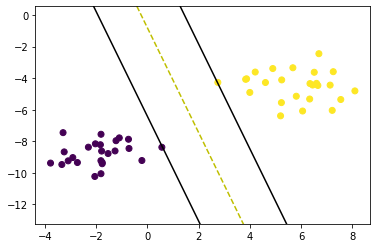

In [12]:
import numpy as np
class SVM:
  def __init__(self,lr=0.001,l=0.01,n_iters=1000):
    self.lr = lr
    self.l = l
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    n_samples,n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for i in range(self.n_iters):
      dw = 0
      db = 0
      for i in range(n_samples):
        lin_model = np.dot(X[i],self.weights) + self.bias
        if y[i]*lin_model>=1:
          dw += 2*self.l*self.weights
          db += 0
        else:
          dw += (2*self.l*self.weights - y[i]*X[i])
          db += -y[i]
      
      self.weights -= self.lr*dw
      self.bias -= self.lr*db
    
  def predict(self,X):
    lin_out = np.dot(X,self.weights) + self.bias
    return np.sign(lin_out)

# Testing
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    import matplotlib.pyplot as plt

    X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)
    # predictions = clf.predict(X)

    print(clf.weights, clf.bias)

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x - b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.weights, clf.bias, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.weights, clf.bias, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.weights, clf.bias, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.weights, clf.bias, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.weights, clf.bias, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.weights, clf.bias, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()